# Analysis for Differential Jet Mass in Z+Jets events with NanoAODv9

In [1]:
import awkward as ak
import numpy as np
import time
import coffea
import uproot
import hist
import vector
print("awkward version ", ak.__version__)
print("coffea version ", coffea.__version__)
from coffea import util, processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from collections import defaultdict
import pickle

import dask
#from distributed.diagnostics.plugin import UploadDirectory
import os 



#from cms_utils import *
print("numpy version", np.__version__)
print("dask version", dask.__version__)

awkward version  1.10.3
coffea version  0.7.22
numpy version 1.23.5
dask version 2023.3.1


### Automatically reload any modules used

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

from python.response_maker_nanov9_lib import *
from python.response_maker_nanov9 import *
from python.smp_utils import *
from python.cms_utils import *

In [4]:
#f = uproot.open("root://xcache//store/mc/RunIISummer20UL16NanoAODv9/DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/260000/18D0A087-30BD-FE4E-B447-5F493C2D2794.root")

In [5]:
#f["Events"].keys()

In [6]:
# from dask.distributed import Client

# client = Client("tls://192.168.86.46:8786")
# client

# client.register_worker_plugin(UploadDirectory("/home/ZJet/QJetMassUproot/", restart=True, update_path=True))
# #print(client.run(os.listdir, "dask-worker-space") )
# client.scheduler_info()['workers']

In [7]:
from distributed import Client
from lpcjobqueue import LPCCondorCluster

cluster = LPCCondorCluster(transfer_input_files = [ "correctionFiles", "samples", "python"], 
                           ship_env = False,
                           memory = "5GB",
                          scheduler_options={"dashboard_address": ":2018"})
cluster.adapt(minimum=0, maximum=300)


client = Client(cluster)
client

Connection method: Cluster object,Cluster type: lpcjobqueue.LPCCondorCluster
Dashboard: http://131.225.191.97:2018/status,
Dashboard: http://131.225.191.97:2018/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://131.225.191.97:10074,Workers: 0
Dashboard: http://131.225.191.97:2018/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [8]:
# client.register_worker_plugin(UploadDirectory("/home/ZJet/QJetMassUproot/", restart=True, update_path=True), nanny=True)
# #print(client.run(os.listdir, "dask-worker-space") )

### If desired, uncomment these to move or remove old pkl files

In [9]:
#! mv qjetmass_zjets_gen.pkl qjetmass_zjets_gen_old.pkl
#! mv qjetmass_zjets_reco.pkl qjetmass_zjets_reco_old.pkl

In [10]:
# client.scheduler_info()['workers']

### If you want to rerun, here is the line. Otherwise keep it commented to just read the pkl file. 

In [11]:
#client = Client(cluster)
#print(client.run(os.listdir) )
#client.scheduler_info()['workers']

In [12]:


# eras_mc = ['UL16NanoAODv9']
# for era in eras_mc:
#     response_maker_nanov9(testing=False, do_gen=True, client=client, prependstr="root://cmsxrootd.fnal.gov/", eras_mc=[era], jet_syst = 'nominal', dask = True)
#     #response_maker_nanov9(testing=False, do_gen=False, client=client)
#     print("Done running 2016")
    

In [13]:

jet_systematics = ['nominal', 'JERUp', 'JERDown', 'hem',
 'JES_AbsoluteMPFBiasUp', 'JES_AbsoluteMPFBiasDown', 'JES_AbsoluteScaleUp', 'JES_AbsoluteScaleDown', 
 'JES_AbsoluteStatUp', 'JES_AbsoluteStatDown', 'JES_FlavorQCDUp', 'JES_FlavorQCDDown', 'JES_FragmentationUp', 
 'JES_FragmentationDown', 'JES_PileUpDataMCUp', 'JES_PileUpDataMCDown', 'JES_PileUpPtBBUp', 'JES_PileUpPtBBDown', 
 'JES_PileUpPtEC1Up', 'JES_PileUpPtEC1Down', 'JES_PileUpPtEC2Up', 'JES_PileUpPtEC2Down', 'JES_PileUpPtHFUp', 'JES_PileUpPtHFDown', 
 'JES_PileUpPtRefUp', 'JES_PileUpPtRefDown', 'JES_RelativeFSRUp', 'JES_RelativeFSRDown', 'JES_RelativeJEREC1Up', 'JES_RelativeJEREC1Down',
 'JES_RelativeJEREC2Up', 'JES_RelativeJEREC2Down', 'JES_RelativeJERHFUp', 'JES_RelativeJERHFDown', 'JES_RelativePtBBUp', 'JES_RelativePtBBDown',
 'JES_RelativePtEC1Up', 'JES_RelativePtEC1Down', 'JES_RelativePtEC2Up', 
 'JES_RelativePtEC2Down', 'JES_RelativePtHFUp', 'JES_RelativePtHFDown', 'JES_RelativeBalUp', 
 'JES_RelativeBalDown', 'JES_RelativeSampleUp', 'JES_RelativeSampleDown', 'JES_RelativeStatECUp', 'JES_RelativeStatECDown',
 'JES_RelativeStatFSRUp', 'JES_RelativeStatFSRDown', 'JES_RelativeStatHFUp', 'JES_RelativeStatHFDown', 'JES_SinglePionECALUp', 'JES_SinglePionECALDown', 
 'JES_SinglePionHCALUp', 'JES_SinglePionHCALDown', 'JES_TimePtEtaUp', 'JES_TimePtEtaDown', 'JMRUp', 'JMRDown', 'JMSUp', 'JMSDown']

systematics = ['nominal', 'puUp', 'puDown' , 'elerecoUp', 'elerecoDown', 
                                'eleidUp', 'eleidDown', 'eletrigUp', 'eletrigDown', 'murecoUp', 'murecoDown', 
                                'muidUp', 'muidDown', 'mutrigUp', 'mutrigDown', 
                                'pdfUp', 'pdfDown', 'q2Up', 'q2Down',
                                'prefiringUp', 'prefiringDown'] 

In [14]:

jet_systematics = ['nominal', 'JMRUp', 'JMRDown', 'JMSUp', 'JMSDown']

systematics = ['nominal'] 

In [ ]:
import warnings

dask = False
eras_mc = ['UL16NanoAODAPVv9', 'UL16NanoAODv9','UL17NanoAODv9', 'UL18NanoAODv9']

#eras_mc = ['UL16NanoAODv9']
if not dask:
    client_1 = None
else:
    client_1 = client
    
#client= None

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    response_maker_nanov9(testing = False, 
                          do_gen = True,
                          client=client_1,
                          prependstr="root://cmsxrootd.fnal.gov/", 
                          eras_mc=eras_mc,
                          do_syst = False, 
                          do_jk = False, 
                          dask = dask, 
                          do_herwig = False,
                          syst_list = systematics,
                          jet_syst_list = jet_systematics,
                          fname_out = 'outputs/gen_checking_total_event.pkl')
    #response_maker_nanov9(testing=False, do_gen=False, client=client)
    print("Done running All")


Chunk Size  200000
Running over PYTHIA MC
Running...


Output()

Exception ignored in: <bound method GCDiagnosis._gc_callback of <distributed.utils_perf.GCDiagnosis object at 0x7f9c75714700>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/utils_perf.py", line 183, in _gc_callback
    self._fractional_timer.start_timing()
  File "/opt/conda/lib/python3.10/site-packages/distributed/utils_perf.py", line 118, in start_timing
    assert self._cur_start is None
AssertionError: 
Exception ignored in: <bound method GCDiagnosis._gc_callback of <distributed.utils_perf.GCDiagnosis object at 0x7f9c75714700>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/utils_perf.py", line 183, in _gc_callback
    self._fractional_timer.start_timing()
  File "/opt/conda/lib/python3.10/site-packages/distributed/utils_perf.py", line 118, in start_timing
    assert self._cur_start is None
AssertionError: 
Exception ignored in: <bound method GCDiagnosis._gc_callback of <distributed.uti

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

In [2]:
import pickle
filename = 'outputs/gen_jet_syst_v12.pkl'
with open(filename, 'rb') as f:
    output = pickle.load(f)

import pickle
filename = 'outputs/gen_mbins_2times_nosyst_v4.pkl'
with open(filename, 'rb') as f:
    output2 = pickle.load(f)

import pickle
filename = 'outputs/reco_mbins_2times_syst_v3.pkl'
with open(filename, 'rb') as f:
    output3 = pickle.load(f)

In [3]:
output['misses'].project('mgen').values()


array([  3786.84615283,  22342.7697778 , 169103.18478216, 117412.1609991 ,
        45026.47311621,  17094.45251747,   7963.11226066])

In [6]:
output['response_matrix_g']

Hist(
  StrCategory(['UL16NanoAODAPVv9', 'UL18NanoAODv9', 'UL17NanoAODv9', 'UL16NanoAODv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([140, 200, 260, 350, 460, 13000], name='ptreco', label='p_{T,RECO} (GeV)'),
  Variable([0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 13000], name='mreco', label='m_{RECO} (GeV)'),
  Variable([140, 200, 260, 350, 460, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 10, 20, 40, 60, 80, 100, 13000], name='mgen', label='Mass (GeV)'),
  StrCategory(['nominal', 'JMRUp', 'JMRDown', 'JMSUp', 'JMSDown'], growth=True, name='systematic', label='Systematic Uncertainty'),
  storage=Weight()) # Sum: WeightedSum(value=497746, variance=111277) (WeightedSum(value=515657, variance=118026) with flow)

In [4]:
output['fakes'].project('ptreco','mreco').values()[1]

array([  5.13546646,  10.73667178,  31.92421492,  61.87708473,
       242.38637966, 264.85867628, 183.22879556,  96.71377423,
        77.30692682,  55.62292995,  32.85631497,  21.06239572,
         9.5696371 ,   2.87996995])

(0.0, 200.0)

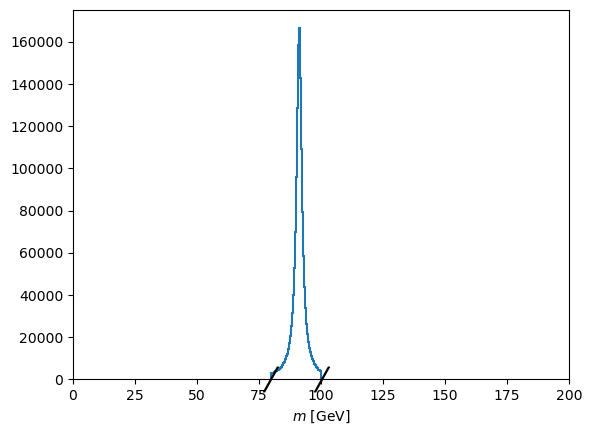

In [5]:
import matplotlib.pyplot as plt
output['mz_gen'].project('mass').plot()

plt.xlim(0,200)

In [19]:
output3['ptjet_mjet_g_reco'].project('mreco')

Hist(Variable([0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 13000], name='mreco', label='m_{RECO} (GeV)'), storage=Weight()) # Sum: WeightedSum(value=201905, variance=201905)

In [20]:
output['response_matrix_g']

Hist(
  StrCategory(['UL16NanoAODv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([140, 200, 260, 350, 460, 13000], name='ptreco', label='p_{T,RECO} (GeV)'),
  Variable([0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 13000], name='mreco', label='m_{RECO} (GeV)'),
  Variable([140, 200, 260, 350, 460, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 10, 20, 40, 60, 80, 100, 13000], name='mgen', label='Mass (GeV)'),
  StrCategory(['nominal', 'puUp', 'puDown', 'elerecoUp', 'elerecoDown', 'eleidUp', 'eleidDown', 'eletrigUp', 'eletrigDown', 'murecoUp', 'murecoDown', 'muidUp', 'muidDown', 'mutrigUp', 'mutrigDown', 'pdfUp', 'pdfDown', 'q2Up', 'q2Down', 'prefiringUp', 'prefiringDown', 'JERUp', 'JERDown', 'hem', 'JES_AbsoluteMPFBiasUp', 'JES_AbsoluteMPFBiasDown', 'JES_AbsoluteScaleUp', 'JES_AbsoluteScaleDown', 'JES_AbsoluteStatUp', 'JES_AbsoluteStatDown', 'JES_FlavorQCDUp', 'JES_FlavorQCDDown', 'JES_FragmentationUp', 'JES_FragmentationDown', 'JES_Pil

(0.0, 100.0)

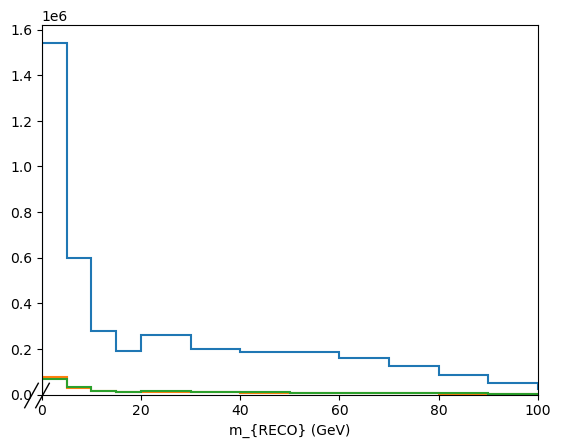

2024-07-16 14:11:19,920 - distributed.deploy.adaptive_core - ERROR - cannot schedule new futures after shutdown
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/utils.py", line 748, in wrapper
    return await func(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/distributed/deploy/adaptive.py", line 204, in scale_down
    await f
  File "/opt/conda/lib/python3.10/site-packages/distributed/deploy/spec.py", line 577, in scale_down
    await self
  File "/opt/conda/lib/python3.10/site-packages/distributed/deploy/spec.py", line 413, in _
    await self._correct_state()
  File "/opt/conda/lib/python3.10/site-packages/distributed/deploy/spec.py", line 354, in _correct_state_internal
    await asyncio.gather(*tasks)
  File "/srv/projects/delete_later/.env/lib/python3.10/site-packages/lpcjobqueue/cluster.py", line 157, in close
    raise ex
  File "/srv/projects/delete_later/.env/lib/python3.10/site-packages/lpcjobqueue/cluster.py"

In [21]:
output['response_matrix_g'].project('mreco').plot(density = False)
output2['response_matrix_g'].project('mreco').plot(density = False)
output3['ptjet_mjet_g_reco'].project('mreco').plot(density = False)
plt.xlim(0,100)

In [ ]:
output['mz_gen']

In [ ]:
output['response_matrix_u'].project('ptreco', 'mreco', 'ptgen', 'mgen').values().shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(np.log(output['response_matrix_u'].project('ptreco', 'mreco', 'ptgen', 'mgen').values().reshape(70,35).T))

In [ ]:
output.keys()

In [ ]:
from coffea.lookup_tools.dense_lookup import dense_lookup
a = uproot.open("correctionFiles/eleSF/egammaEffi_EGM2D.root")
histobj = a['EGamma_SF2D;1'].to_hist()
corr = dense_lookup(histobj.values(), [ax.edges for ax in histobj.axes])
print(corr)

In [ ]:
sfhist = hist.Hist(*histobj.axes, data=histobj.values())
sfhist.plot2d()

In [ ]:
corr(ak.Array([-1.5,0.3]), ak.Array([30,50]))